# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_discord_15.csv")
df.head()

,userName,score,at,content
0,AkunEpep,1,2024-04-12 12:51:28,blom nyoba
1,Raka Kurniawan,1,2024-04-12 11:29:48,Aelah banyak banget embel embel nya udah Regis...
2,Evelynn Nababan,4,2024-04-12 11:28:57,"Bagus aplikasinya, tapi ada masalah tiba-tiba ..."
3,EsA,4,2024-04-12 11:18:04,mantap
4,Glivor Geslauw,5,2024-04-12 10:28:43,Keren


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,blom nyoba,AkunEpep,2024-04-12 12:51:28
1,Aelah banyak banget embel embel nya udah Regis...,Raka Kurniawan,2024-04-12 11:29:48
2,"Bagus aplikasinya, tapi ada masalah tiba-tiba ...",Evelynn Nababan,2024-04-12 11:28:57
3,mantap,EsA,2024-04-12 11:18:04
4,Keren,Glivor Geslauw,2024-04-12 10:28:43
...,...,...,...
990,Please lahh jgn Verifikasi dari email itu akun...,RAFLY OSAMU,2024-02-15 14:18:44
991,Tolong perbaiki bug di saat saya memiliki komu...,Bara Kiesha,2024-02-15 12:49:25
992,Sayang nya tidak ada bahasa indonesia,Rizkika channel,2024-02-15 12:46:07
993,Makin update makin gajelas 😁 pantes rating nya...,Leaxy Ch,2024-02-15 12:23:17


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   995 non-null    object
 1   userName  995 non-null    object
 2   at        995 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,995,995,995
unique,949,994,994
top,Good,Pengguna Google,2024-03-11 08:46:21
freq,11,2,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(995, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(949, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,blom nyoba,AkunEpep,2024-04-12 12:51:28
1,aelah banyak banget embel embel nya udah regis...,Raka Kurniawan,2024-04-12 11:29:48
2,bagus aplikasinya tapi ada masalah tibatiba pa...,Evelynn Nababan,2024-04-12 11:28:57
3,mantap,EsA,2024-04-12 11:18:04
4,keren,Glivor Geslauw,2024-04-12 10:28:43
...,...,...,...
989,i think old ui its not badi suggest keep it us...,Risky Firmansyah,2024-02-15 14:53:55
990,please lahh jgn verifikasi dari email itu akun...,RAFLY OSAMU,2024-02-15 14:18:44
991,tolong perbaiki bug di saat saya memiliki komu...,Bara Kiesha,2024-02-15 12:49:25
992,sayang nya tidak ada bahasa indonesia,Rizkika channel,2024-02-15 12:46:07


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,blom nyoba,AkunEpep,2024-04-12 12:51:28
1,banyak banget embel embel nya udah regis mala...,Raka Kurniawan,2024-04-12 11:29:48
2,bagus aplikasinya tapi ada masalah tibatiba pa...,Evelynn Nababan,2024-04-12 11:28:57
3,mantap,EsA,2024-04-12 11:18:04
4,keren,Glivor Geslauw,2024-04-12 10:28:43
...,...,...,...
989,i think old ui its not badi suggest keep it us...,Risky Firmansyah,2024-02-15 14:53:55
990,please lahh jugan verifikasi dari email itu ak...,RAFLY OSAMU,2024-02-15 14:18:44
991,tolong perbaiki bug di saat saya memiliki komu...,Bara Kiesha,2024-02-15 12:49:25
992,sayang nya tidak ada bahasa indonesia,Rizkika channel,2024-02-15 12:46:07


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,blom nyoba,AkunEpep,2024-04-12 12:51:28
1,banyak banget embel embel nya udah regis mala...,Raka Kurniawan,2024-04-12 11:29:48
2,bagus aplikasinya ada masalah tibatiba pas mas...,Evelynn Nababan,2024-04-12 11:28:57
3,mantap,EsA,2024-04-12 11:18:04
4,keren,Glivor Geslauw,2024-04-12 10:28:43
...,...,...,...
989,i think old ui its not badi suggest keep it us...,Risky Firmansyah,2024-02-15 14:53:55
990,please lahh jugan verifikasi email akun yang b...,RAFLY OSAMU,2024-02-15 14:18:44
991,perbaiki bug saat memiliki komunitas bikin sen...,Bara Kiesha,2024-02-15 12:49:25
992,sayang nya ada bahasa indonesia,Rizkika channel,2024-02-15 12:46:07


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                          [blom, nyoba]
1      [banyak, banget, embel, embel, nya, udah, regi...
2      [bagus, aplikasinya, ada, masalah, tibatiba, p...
3                                               [mantap]
4                                                [keren]
                             ...                        
989    [i, think, old, ui, its, not, badi, suggest, k...
990    [please, lahh, jugan, verifikasi, email, akun,...
991    [perbaiki, bug, saat, memiliki, komunitas, bik...
992                [sayang, nya, ada, bahasa, indonesia]
993    [makin, update, makin, jelas, pantas, rating, ...
Name: content, Length: 949, dtype: object

In [ ]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_discord_15.csv', index = False)


In [19]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_discord_15.csv', encoding = 'latin1')
df_clean

,content
0,blom nyoba
1,banyak banget embel embel nya udah regis malah...
2,bagus aplikasi ada masalah tibatiba pas masuki...
3,mantap
4,keren
...,...
944,i think old ui its not badi suggest keep it us...
945,please lahh jugan verifikasi email akun yang b...
946,baik bug saat milik komunitas bikin sendiri sa...
947,sayang nya ada bahasa indonesia


# **Translate**

In [ ]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [ ]:
# import pandas as pd
# from easynmt import EasyNMT
# model = EasyNMT('opus-mt')

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_discord_15.csv', encoding='latin1')

# source_lang = 'id'
# target_lang = 'en'

# df2 = df_clean.fillna(method = 'pad')
# df2

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_discord_15.csv')

In [20]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_discord_15.csv')
df2

,Unnamed: 0,content,content_en
0,0,blom nyoba,don't try.
1,1,banyak banget embel embel nya udah regis malah...,That's a lot of scraps. It's a stretch.
2,2,bagus aplikasi ada masalah tibatiba pas masuki...,"fontcolor="" # FFFF00""good application fontcolo..."
3,3,mantap,Steady.
4,4,keren,Cool.
...,...,...,...
944,944,i think old ui its not badi suggest keep it us...,I think old ui its not badi suggestest keep it...
945,945,please lahh jugan verifikasi email akun yang b...,Please also verify that account's email.
946,946,baik bug saat milik komunitas bikin sendiri sa...,either bug when belonging to the community mak...
947,947,sayang nya ada bahasa indonesia,Too bad there's English.


# **Labeling**

In [21]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_discord_15.csv')
df2

,Unnamed: 0,content,content_en
0,0,blom nyoba,don't try.
1,1,banyak banget embel embel nya udah regis malah...,That's a lot of scraps. It's a stretch.
2,2,bagus aplikasi ada masalah tibatiba pas masuki...,"fontcolor="" # FFFF00""good application fontcolo..."
3,3,mantap,Steady.
4,4,keren,Cool.
...,...,...,...
944,944,i think old ui its not badi suggest keep it us...,I think old ui its not badi suggestest keep it...
945,945,please lahh jugan verifikasi email akun yang b...,Please also verify that account's email.
946,946,baik bug saat milik komunitas bikin sendiri sa...,either bug when belonging to the community mak...
947,947,sayang nya ada bahasa indonesia,Too bad there's English.


In [22]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [23]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 333
Netral = 392
Negatif = 224

Total Data Seluruhnya : 949


In [25]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,blom nyoba,don't try.,Netral
1,1,banyak banget embel embel nya udah regis malah...,That's a lot of scraps. It's a stretch.,Netral
2,2,bagus aplikasi ada masalah tibatiba pas masuki...,"fontcolor="" # FFFF00""good application fontcolo...",Positif
3,3,mantap,Steady.,Positif
4,4,keren,Cool.,Positif
...,...,...,...,...
944,944,i think old ui its not badi suggest keep it us...,I think old ui its not badi suggestest keep it...,Positif
945,945,please lahh jugan verifikasi email akun yang b...,Please also verify that account's email.,Netral
946,946,baik bug saat milik komunitas bikin sendiri sa...,either bug when belonging to the community mak...,Netral
947,947,sayang nya ada bahasa indonesia,Too bad there's English.,Negatif


In [26]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,blom nyoba,don't try.,Netral
1,banyak banget embel embel nya udah regis malah...,That's a lot of scraps. It's a stretch.,Netral
2,bagus aplikasi ada masalah tibatiba pas masuki...,"fontcolor="" # FFFF00""good application fontcolo...",Positif
3,mantap,Steady.,Positif
4,keren,Cool.,Positif
...,...,...,...
944,i think old ui its not badi suggest keep it us...,I think old ui its not badi suggestest keep it...,Positif
945,please lahh jugan verifikasi email akun yang b...,Please also verify that account's email.,Netral
946,baik bug saat milik komunitas bikin sendiri sa...,either bug when belonging to the community mak...,Netral
947,sayang nya ada bahasa indonesia,Too bad there's English.,Negatif


# **Visualisasi**


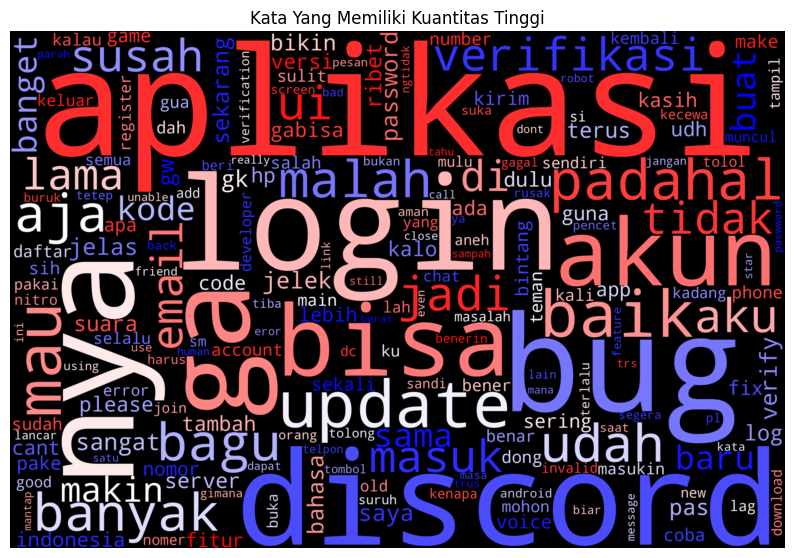

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


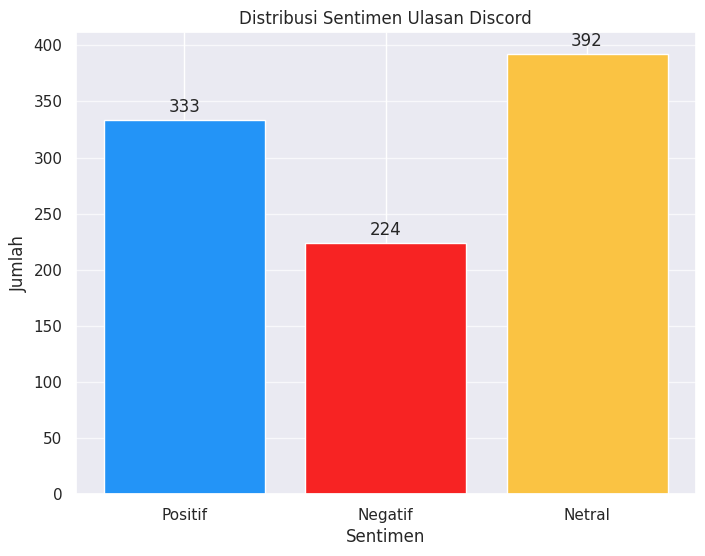

In [28]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [29]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
2,bagus aplikasi ada masalah tibatiba pas masuki...,"fontcolor="" # FFFF00""good application fontcolo...",Positif
3,mantap,Steady.,Positif
4,keren,Cool.,Positif
5,aplikasi ini iini waw sangat the best,this application iini waw very the best,Positif
6,aplikasi nya bagus,Nice application.,Positif
...,...,...,...
941,aplikasi nya lebih buruk epep,Her application is worse.,Negatif
943,maap tapi login nya gk ya padahal email sama p...,"I'm sorry, but the login' doesn't matter. The ...",Negatif
944,i think old ui its not badi suggest keep it us...,I think old ui its not badi suggestest keep it...,Positif
947,sayang nya ada bahasa indonesia,Too bad there's English.,Negatif


In [30]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
2,bagus aplikasi ada masalah tibatiba pas masuki...,"fontcolor="" # FFFF00""good application fontcolo...",1
3,mantap,Steady.,1
4,keren,Cool.,1
5,aplikasi ini iini waw sangat the best,this application iini waw very the best,1
6,aplikasi nya bagus,Nice application.,1
...,...,...,...
941,aplikasi nya lebih buruk epep,Her application is worse.,0
943,maap tapi login nya gk ya padahal email sama p...,"I'm sorry, but the login' doesn't matter. The ...",0
944,i think old ui its not badi suggest keep it us...,I think old ui its not badi suggestest keep it...,1
947,sayang nya ada bahasa indonesia,Too bad there's English.,0


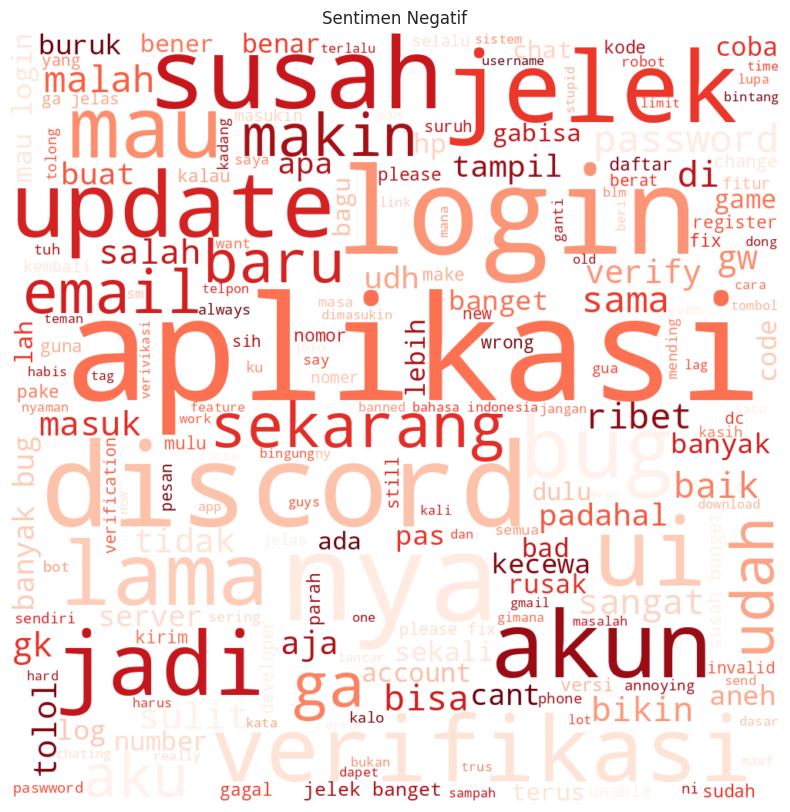

In [31]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

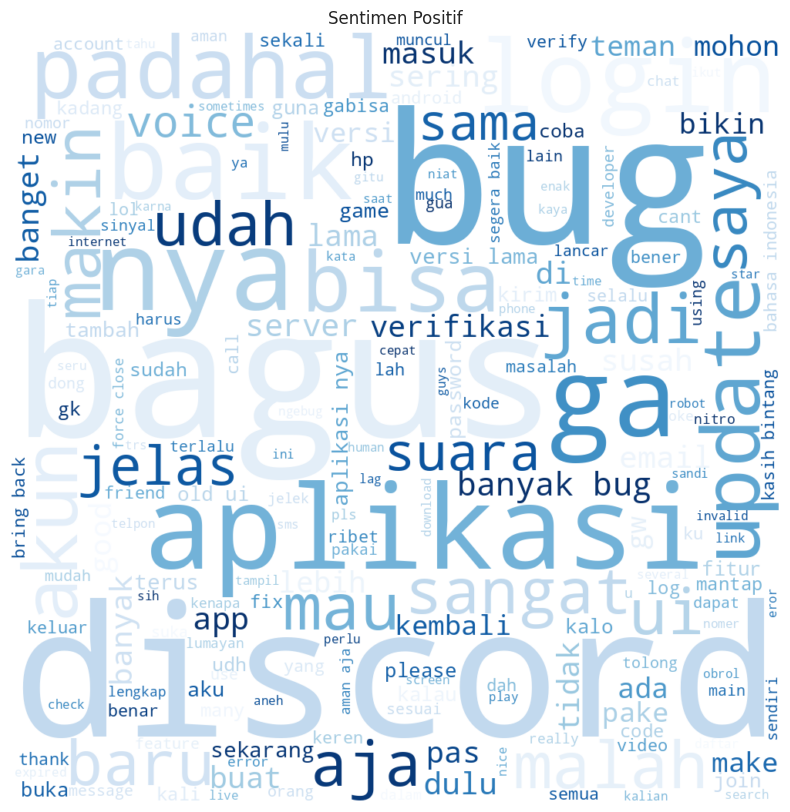

In [32]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [33]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    333
0    224
Name: count, dtype: int64

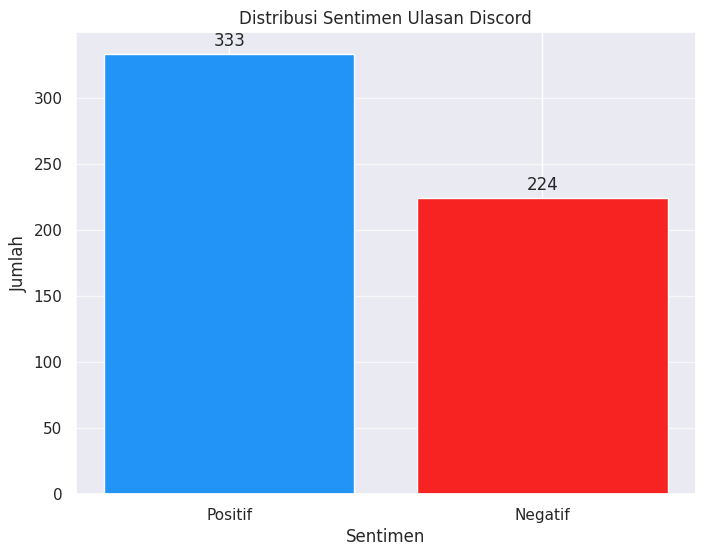

In [34]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

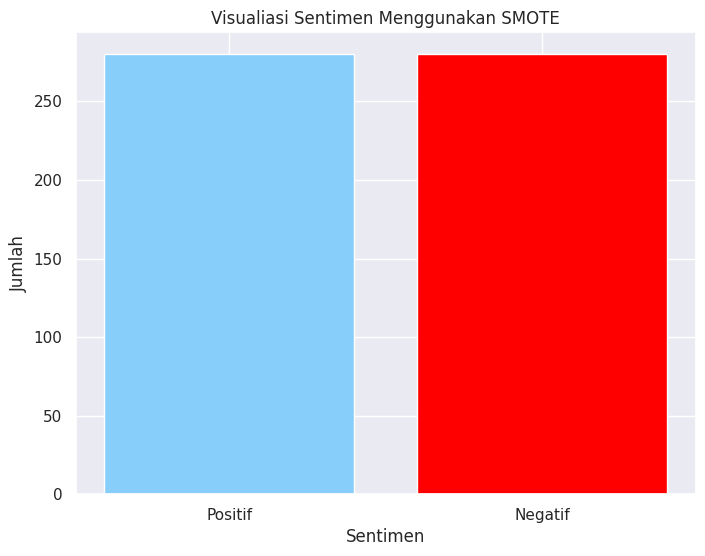

In [50]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [51]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

In [53]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6904761904761905

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.58      0.61      0.59        31
     Positif       0.76      0.74      0.75        53

    accuracy                           0.69        84
   macro avg       0.67      0.67      0.67        84
weighted avg       0.69      0.69      0.69        84



# **Testing**


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasinya bagus dan sangat membantu
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [57]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek banyak bug tidak bisa login lag banget
Hasil Analisis Sentimen Untuk Teks Baru : Negatif
